# Car Price Prediction Project

### Introduction

Perhaps the second most desirable item to possess here in America behind houses has to be an automobile. In fact, one could argue that it's even more desirable than a home. After all, the majorityof Americans own more than 1 automobile, but rarely own more than 1 home. 

Similar to my House Prices prediction project, this project will be dedicated to predicting car prices based upon the set of given features of our dataset. The dataset that we will be working with can be found in this project's repository on my GitHub. Whereas in the House Prices project we utilized Linear Regression, we will be appling the K-nearest neighbors algorithm.

### Preprocessing

In [1]:
# We first import our necessary packages
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
# Next we read in our dataset and make any adjustments to the columns
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=columns)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Notice that we have categorical as well as numeric continuous variables.
# We should isolate the numeric variables
numerical_variables = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
numeric_cars = cars[numerical_variables]  # We create a new feature matrix 
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


### Data Cleaning

For our model to run correctly, we have to make sure any NaN values are dealt with. Let's take a look at which variables are continuous or discrete. If they are discrete, we will replace the NaN values with the median. If they are continuous, we will replace the NaN values with the mean. 

In [4]:
# First let's take a look at which columns have the most null values
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

In [5]:
# It looks as though our dataframe replaces NaN with ?. We'll need to change that
numeric_cars.replace('?', np.nan, inplace=True)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [6]:
# Let's try again
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
dtype: int64

In [7]:
# That's better. First, let's convert the columns containing a ? to numeric types
numeric_cars = numeric_cars.astype('float')

In [8]:
# Now we wish to differentiate between continuous and discrete values
for column in numeric_cars.columns:
    if len(numeric_cars[column].unique()) > 10:
        print('The', column, 'is continuous')
    else:
        print("The", column, "is discrete")

The normalized-losses is continuous
The wheel-base is continuous
The length is continuous
The width is continuous
The height is continuous
The curb-weight is continuous
The engine-size is continuous
The bore is continuous
The stroke is continuous
The compression-rate is continuous
The horsepower is continuous
The peak-rpm is continuous
The city-mpg is continuous
The highway-mpg is continuous


In [9]:
# We now place our price column back our new dataframe
cars['price'].replace('?', np.nan, inplace=True)
cars['price'] = cars['price'].astype('float')

In [10]:
numeric_cars['price'] = cars['price']

In [11]:
# All of our variables are continuous. We will replace the NaN with the mean
for column in numeric_cars.columns:
    numeric_cars[column].replace(np.nan, numeric_cars[column].mean(), inplace=True)

In [12]:
# Let's check to make sure our change worked
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
# Let's check the status of our dataframe
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [14]:
# Now, let's normalize our data set. We could use Standard Scaler or just create
# a function ourselves. Let's do the latter.
def normalize_variables(df):  # Take a dataframe as an input
    for column in df.columns:  # Iterate over the columns
        mean = df[column].mean()  # Find the column mean
        col_range = df[column].max() - df[column].mean()  # Find the column range
        df[column] = df[column].apply(lambda x: (x - mean) / col_range)  # Replace each value in the column with the normalized mean of the element
    return df  # Return the transformed dataframe

In [15]:
# We now apply our function to our dataframe. We'll check to ensure our transformation worked after
normalized_cars = normalize_variables(numeric_cars.drop('price', axis=1))

In [16]:
# We now add back our price column
normalized_cars['price'] = numeric_cars['price']

In [17]:
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-0.458673,-0.154160,-0.282814,-0.810663,-0.005009,0.015534,0.229822,-0.629168,-0.088862,0.036702,-0.085018,-0.177436,-0.161351,13495.0
1,0.000000,-0.458673,-0.154160,-0.282814,-0.810663,-0.005009,0.015534,0.229822,-0.629168,-0.088862,0.036702,-0.085018,-0.177436,-0.161351,16500.0
2,0.000000,-0.192228,-0.083677,-0.063797,-0.218083,0.177058,0.126035,-1.064732,0.234619,-0.088862,0.270724,-0.085018,-0.261538,-0.204364,16500.0
3,0.313433,0.047121,0.074910,0.045711,0.094668,-0.144704,-0.089945,-0.229007,0.158081,-0.011086,-0.012279,0.254050,-0.051282,-0.032312,13950.0
4,0.313433,0.029057,0.074910,0.076999,0.094668,0.177720,0.045671,-0.229007,0.158081,-0.166638,0.058472,0.254050,-0.303590,-0.376416,17450.0


### Model Creation

We now have the data necessary to begin creating our model. As we stated in the introduction, we will be using a k-nearest neighbors approach to this problem with k-fold cross validation to help assess our accuracy.

I understand that Linear or Polynomial regression may be the better choice for a project like this, but again, I would like this project to demonstrate that I understand how to implement a k-nearest neighbors model.

We will begin our model construction by creating a function that will perform a good portion of the construction process for us. The comments below will explain each step in more detail.

In [18]:
# We now create our function for our K-Nearest neighbors model
def knn_train_test(training_column, target, df):
    knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto')  # We create an instance of our model
    np.random.seed(1)  # We define our random seed
    
    shuffled_index = np.random.permutation(df.index)  # Randomize our dataset rows
    df = df.reindex(shuffled_index)  # Apply the randomized rows to our set
    
    dividing_row = int(len(df) / 2)  # We will perform a 50:50 split
    train_df = df.iloc[0:dividing_row]
    test_df = df.iloc[dividing_row:]
    
    knn.fit(train_df[[training_column]], train_df[target])
    predictions = knn.predict(test_df[[training_column]])
    rmse = (mean_squared_error(test_df[target], predictions)) ** (1/2)
    return rmse

### Model Implementation and Revision

We now are ready to implement our model. To start, we will iterate through each column of our dataset and find which column gives us the lowest rmse score. From there, we will modify our function to peform a grid search in order to find the best hyperparameter "k" for our model.

We will then more than likely modify our function for a second time to incorporate more than a single column to improve our accuracy.

In [19]:
# We apply our function below
for column in normalized_cars.columns:
    score = knn_train_test(column, 'price', normalized_cars)
    print('The rmse score for the', column, 'column is', score)

The rmse score for the normalized-losses column is 7407.937937553142
The rmse score for the wheel-base column is 5743.8770860517825
The rmse score for the length column is 5418.792688609786
The rmse score for the width column is 5279.803117783293
The rmse score for the height column is 7822.949167142879
The rmse score for the curb-weight column is 4436.523561278551
The rmse score for the engine-size column is 4257.1027981219695
The rmse score for the bore column is 6746.923728484581
The rmse score for the stroke column is 8097.175832307023
The rmse score for the compression-rate column is 7177.202060550313
The rmse score for the horsepower column is 5127.959507774511
The rmse score for the peak-rpm column is 7932.35641493988
The rmse score for the city-mpg column is 5093.397216696797
The rmse score for the highway-mpg column is 4276.870208110033
The rmse score for the price column is 828.7243190039874


Preliminarily, it would appear that the "engine size" column is the column that would help us predict the prices the best. However, let's revise our function to find the optimal hyperparameter value "k".

In [20]:
def knn_train_test(training_column, target, df):
    k_values = [1, 3, 5, 7, 9]
    k_rmse = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k, algorithm='auto')  # We create an instance of our model
        np.random.seed(1)  # We define our random seed
    
        shuffled_index = np.random.permutation(df.index)  # Randomize our dataset rows
        df = df.reindex(shuffled_index)  # Apply the randomized rows to our set
    
        dividing_row = int(len(df) / 2)  # We will perform a 50:50 split
        train_df = df.iloc[0:dividing_row]
        test_df = df.iloc[dividing_row:]
    
        knn.fit(train_df[[training_column]], train_df[target])
        predictions = knn.predict(test_df[[training_column]])
        rmse = (mean_squared_error(test_df[target], predictions)) ** (1/2)
        k_rmse[k] = rmse
    return k_rmse     

In [21]:
# We now apply our function to our feature matrix again.
k_rmse_results = {}
for column in normalized_cars.columns:
    result = knn_train_test(column, 'price', normalized_cars)
    k_rmse_results[column] = result
k_rmse_results

{'bore': {1: 8041.499196464682,
  3: 8031.59525792324,
  5: 8165.608681285838,
  7: 7537.183607518203,
  9: 7171.043575257238},
 'city-mpg': {1: 6433.398158872591,
  3: 5264.729035492814,
  5: 4818.0793313714,
  7: 6009.262647260571,
  9: 4867.434531924221},
 'compression-rate': {1: 7255.772135357892,
  3: 7058.83457118534,
  5: 6006.189742709896,
  7: 7969.953488195231,
  9: 6487.35794389652},
 'curb-weight': {1: 5842.169653813219,
  3: 5107.4506600552995,
  5: 4212.014094758555,
  7: 5127.613815088561,
  9: 4669.859135792812},
 'engine-size': {1: 4775.980594973188,
  3: 4851.223869030591,
  5: 3962.806104717549,
  7: 4886.301958605613,
  9: 4492.478042344975},
 'height': {1: 10653.050778292903,
  3: 8620.851262519,
  5: 7083.196434899195,
  7: 8635.429928882635,
  9: 7907.671197639808},
 'highway-mpg': {1: 4445.090471315778,
  3: 5513.174817505922,
  5: 4376.380354156063,
  7: 5618.231663858651,
  9: 5629.596267020286},
 'horsepower': {1: 5261.091645623908,
  3: 5309.6402162866325,
 

Almost there! Let's plot a chart to visulaize which value of k is the most optimal.

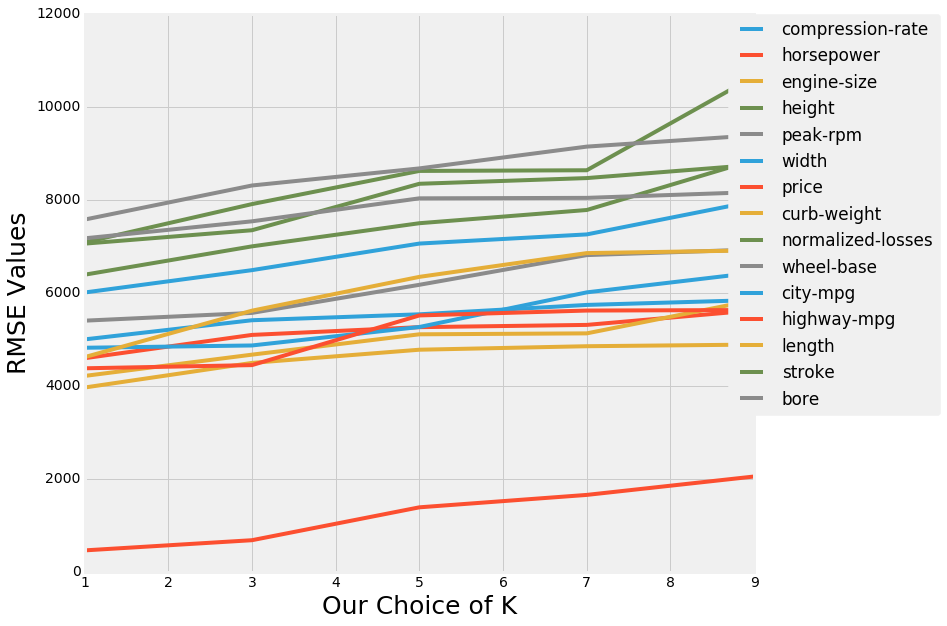

In [22]:
%matplotlib inline
plt.figure(figsize=(12, 10))
style.use('fivethirtyeight')
plt.rc('axes', labelsize=25)
for key, results in k_rmse_results.items():
    x = list(sorted(results.keys()))
    y = list(sorted(results.values()))
    plt.plot(x, y, label=key)
    plt.legend(bbox_to_anchor=(1.29, 1.015) )
    plt.xlabel('Our Choice of K')
    plt.ylabel('RMSE Values')

It appears that the value of 3 is the best to work with. Let's update our function to generate a multivariate model. We will use the best 5 features incrementally to see how our model adjusts to incorporating more than 1 feature.

In [23]:
best_avg_rmse = {}
for key, score in k_rmse_results.items():  # Iterate through our result dict
    avg_rmse = np.mean(list(score.values()))  # Take the average rmse value
    best_avg_rmse[key] = avg_rmse  # Assign each feature it's avg rmse value
series_avg_rmse = pd.Series(best_avg_rmse)  # Convert dict into a Series
best_features = series_avg_rmse.sort_values()  # Sort the series by the avg rmse
best_features = best_features.drop('price')  #  Drop the target price column
best_features.head()

engine-size    4593.758114
curb-weight    4991.821472
highway-mpg    5116.494715
horsepower     5176.233043
city-mpg       5478.580741
dtype: float64

In [24]:
def knn_train_test(training_column, target, df):
    knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto')  # We create an instance of our model
    np.random.seed(1)  # We define our random seed
    
    shuffled_index = np.random.permutation(df.index)  # Randomize our dataset rows
    df = df.reindex(shuffled_index)  # Apply the randomized rows to our set
    
    dividing_row = int(len(df) / 2)  # We will perform a 50:50 split
    train_df = df.iloc[0:dividing_row]
    test_df = df.iloc[dividing_row:]
    
    knn.fit(train_df[training_column], train_df[target])  # Updated to take multiple columns
    predictions = knn.predict(test_df[training_column])
    rmse = (mean_squared_error(test_df[target], predictions)) ** (1/2)
    return rmse

In [25]:
# We will now see how accurate our model is for 2, 3, 4, and 5 best features
best_rmse_features = {}
sorted_features = best_features.index
for i in range(2, 6):
    result = knn_train_test(sorted_features[:i], 'price', normalized_cars)
    best_rmse_features[i] = result
for key, value in best_rmse_features.items():
    print("For {} features, the score was {}.".format(key, value))

For 2 features, the score was 3898.810559890747.
For 3 features, the score was 3712.3710161087824.
For 4 features, the score was 3939.016748410891.
For 5 features, the score was 4021.2158466497726.


### Hyperparameter Optimization

Now that we have our 3 best features to train, let's monkey around with our hyperparameter: the value of k. Recall, we chose some arbitrary k's in an earlier step, but let's cycle through a larger set of values to apply.

In [26]:
def knn_train_test(training_column, target, df):
    k_varying = {}
    for k in range(1, 26):

        knn = KNeighborsRegressor(n_neighbors=k, algorithm='auto')  # Alter k
        np.random.seed(1)  # We define our random seed
    
        shuffled_index = np.random.permutation(df.index)  # Randomize our dataset rows
        df = df.reindex(shuffled_index)  # Apply the randomized rows to our set
    
        dividing_row = int(len(df) / 2)  # We will perform a 50:50 split
        train_df = df.iloc[0:dividing_row]
        test_df = df.iloc[dividing_row:]
    
        knn.fit(train_df[training_column], train_df[target])  # Updated to take multiple columns
        predictions = knn.predict(test_df[training_column])
        rmse = (mean_squared_error(test_df[target], predictions)) ** (1/2)
        k_varying[k] = rmse
    return k_varying

In [27]:
# We now apply our updated function 
different_k = knn_train_test(sorted_features[:3], 'price', normalized_cars)

In [28]:
# We now wish to plot our values to see if we can determine the best value for k
different_k_series = pd.Series(different_k)
different_k_series

1     4106.797749
2     3623.123497
3     3651.633287
4     4463.719417
5     4147.878112
6     4261.357595
7     5334.401284
8     3122.240947
9     5763.424808
10    3476.133796
11    3006.481705
12    5080.796696
13    3503.962246
14    5328.958838
15    4556.016560
16    5234.336506
17    4173.238078
18    4165.259058
19    5359.394021
20    4701.698382
21    5029.745099
22    4272.973206
23    4696.200126
24    4392.777202
25    4775.365962
dtype: float64

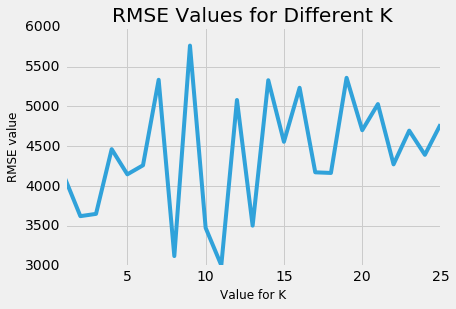

In [30]:
different_k_series.plot()
plt.rc('axes', labelsize=12)
plt.xlabel('Value for K')
plt.ylabel('RMSE value')
plt.title('RMSE Values for Different K')
plt.show()

## Conclusion

For this project, we were able to build a k-nearest neighbors model. Through much experimentation, we were able to determine that our model is most accurate with 3 features and a k-value of 11. While linear regression might be a better candidate, I wanted to demonstrate that I understand how the k-nearest neighbor model is implemented. Refer to the Housing Prices project on my portfolio to see an example of Line